In [4]:
from essi21 import mixing as mm
import numpy as np
import matplotlib.pyplot as plt

## Neukum stuff

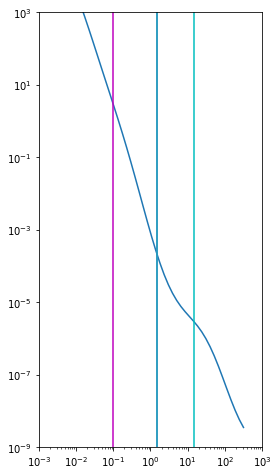

In [46]:
f = plt.figure(figsize=(4, 8))
diams = np.logspace(-3, 2.5) * 1e3
n = np.array([mm.neukum(diam, mm.IVANOV2000) for diam in diams])
plt.loglog(diams*1e-3, n*1e6 * 1e9)
plt.axvline(.1, color='m')
plt.axvline(1.5, color='m')
plt.axvline(1.5, color='c')
plt.axvline(15, color='c')

plt.xlim(0.001, 1000)
plt.ylim(1e-9, 1e3)
plt.show()

In [6]:
num_cn = mm.neukum(100, mm.NEUKUM1983) - mm.neukum(1.5e3, mm.NEUKUM1983)
num_ci = mm.neukum(100, mm.IVANOV2000) - mm.neukum(1.5e3, mm.IVANOV2000)
print(100*(num_cn - num_ci)/num_ci)
# print(num_ci)

num_dn = mm.neukum(1.5e3, mm.NEUKUM1983) - mm.neukum(15e3, mm.NEUKUM1983)
num_di = mm.neukum(1.5e3, mm.IVANOV2000) - mm.neukum(15e3, mm.IVANOV2000)
print(100*(num_dn - num_di)/num_di)
# print(num_ci)

num_en = mm.neukum(15e3, mm.NEUKUM1983) - mm.neukum(300e3, mm.NEUKUM1983)
num_ei = mm.neukum(15e3, mm.IVANOV2000) - mm.neukum(300e3, mm.IVANOV2000)
print(100*(num_en - num_ei)/num_ei)
# print(num_ci)

0.0533551730147042
-2.2316246537284448
-56.21954305107374


## Scaling equations


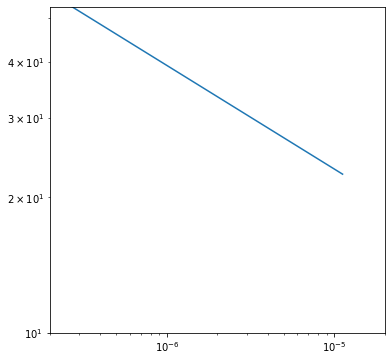

In [41]:
# i_lengths = nplinspace(0.8, 1200)

def pi2(length):
    U = 12.7e3  # m
    g = 1.62  # m/s^2
    return length * 1.61 * g / U**2

def pid(diam, length):
    rho_i = mm.IMPACTOR_DENSITY
    rho_t = mm.TARGET_DENSITY
    i_masses = rho_i * mm.diam2vol(length)
    return diam * (rho_t / i_masses) ** (1/3)
# i_lengths = np.linspace(np.min(t_diam) / 100, np.max(t_diam), len(t_diam))


# pid = t_diam * denom
t_diam = np.linspace(80, 12000)
lengths = mm.diam2len_prieur(t_diam)

lengths = lengths

plt.figure(figsize=(6, 6))
plt.loglog(pi2(lengths), pid(t_diam, lengths))
plt.ylim(10, 53)
plt.xlim(0.2e-6, 2e-5)
plt.show()

In [ ]:
mindiam = 100
maxdiam = 1500



In [10]:
gamma = 1.25
eta = 0.13
d = 300000
(1 / gamma) * (d * ds2c ** eta) ** (1 / (1 + eta))


NameError: name 'ds2c' is not defined

Text(0.5, 0, 'num runs')

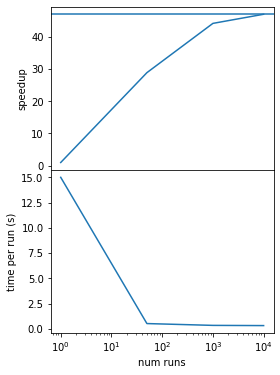

In [67]:
# parallel scaling
# [detached from 24520.pts-8.tiu]
t1 = 15  # [s] time to run once on 1 core
runs = np.array([1, 50, 1000, 10000])
time = np.array([t1, 26, 340, 3195])
t_per_run = time / runs  # [s] 
speedup = t1 / t_per_run

f, ax = plt.subplots(2, sharex=True, figsize=(4, 6))
f.subplots_adjust(hspace=0)
ax[0].semilogx(runs, speedup)
ax[0].axhline(47)
ax[0].set_ylabel('speedup')
ax[1].semilogx(runs, t_per_run)
ax[1].set_ylabel('time per run (s)')
ax[1].set_xlabel('num runs')

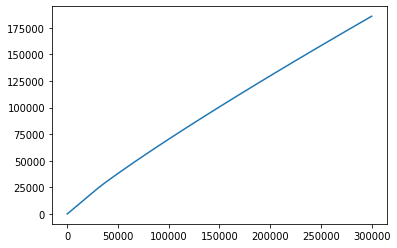

In [70]:
df = np.linspace(0, 300e3)
dt = mm.final2transient(df)
plt.plot(df, dt)

In [72]:
df[:6]

array([    0.        ,  6122.44897959, 12244.89795918, 18367.34693878,
       24489.79591837, 30612.24489796])

In [71]:
df/dt

<ipython-input-71-af978ebccdf0>:1: RuntimeWarning: invalid value encountered in true_divide
  df/dt


array([       nan, 1.25      , 1.25      , 1.25      , 1.25      ,
       1.25      , 1.26818771, 1.29087854, 1.31086214, 1.32874556,
       1.34494945, 1.35977782, 1.37345776, 1.38616359, 1.39803213,
       1.40917279, 1.41967453, 1.42961068, 1.43904241, 1.44802133,
       1.45659136, 1.46479024, 1.47265061, 1.48020091, 1.4874661 ,
       1.49446817, 1.50122662, 1.50775883, 1.51408034, 1.52020512,
       1.52614577, 1.53191369, 1.53751924, 1.54297187, 1.54828018,
       1.55345208, 1.55849482, 1.5634151 , 1.56821906, 1.57291243,
       1.57750048, 1.58198812, 1.58637993, 1.59068016, 1.59489277,
       1.5990215 , 1.60306982, 1.60704099, 1.61093808, 1.61476397])